In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import datetime as dt
import pprint as pp
import pandas as pd
from IPython.display import display
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

c:\users\blair\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
with open('lebron_2018.pkl', 'rb') as fp:
    lebron = pickle.load(fp)

In [37]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [4]:
scaler = StandardScaler()
X = lebron["X"]
y = lebron["y"]


X = X[:-1]
y = y[:-1]
X = X[1:]
y = y[1:]

X = scaler.fit_transform(X,y)
print(np.shape(X))


param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}
 ]
train_split = 3/4
train_n = int(len(y)*train_split)

rfr = RandomForestRegressor()

param_grid = {"n_estimators": [5,10,25,50,100],
              "max_features": [1, 5, 10, 15, 20],
              "min_samples_split": [2, 5],
              "criterion": ["mae", "mse"]}

best_score = 0;
current_score = 0
for g in ParameterGrid(param_grid):
    rfr.set_params(**g)
    rfr.fit(X[:train_n],y[:train_n])
    rfr.predict(X[train_n:])
    current_score = rfr.score(X[train_n:],y[train_n:])
    # save if best
    if current_score > best_score:
        best_score = current_score
        best_grid = g

print (best_score) 
print (best_grid)



(153, 22)
0.1271810237533222
{'criterion': 'mse', 'max_features': 10, 'min_samples_split': 5, 'n_estimators': 5}


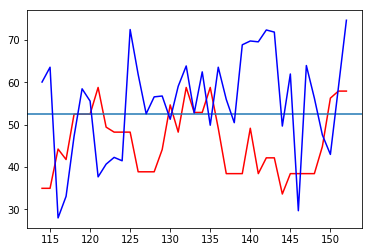

-1.1231916768748689
Variable: ave_blk1             Importance: 0.17
Variable: ave_fantasy_points1  Importance: 0.16
Variable: ave_reb1             Importance: 0.14
Variable: ave_ast1             Importance: 0.09
Variable: mu_ast               Importance: 0.09
Variable: ave_to1              Importance: 0.08
Variable: ave_ftm1             Importance: 0.07
Variable: mu_blk               Importance: 0.06
Variable: ae_stl1              Importance: 0.05
Variable: ave_min1             Importance: 0.03
Variable: ave_pts1             Importance: 0.03
Variable: mu_min               Importance: 0.0
Variable: mu_ftm               Importance: 0.0
Variable: mu_pts               Importance: 0.0
Variable: mu_reb               Importance: 0.0
Variable: mu_stl               Importance: 0.0
Variable: mu_tov               Importance: 0.0
Variable: mu_fantasy_points    Importance: 0.0


In [17]:

rfr = RandomForestRegressor()
rfr.set_params(**best_grid)
rfr.fit(X[:train_n],y[:train_n])

plt.plot(list(range(train_n,len(y))),rfr.predict(X[train_n:]),'r')
plt.axhline(y = np.average(y))
plt.plot(list(range(train_n,len(y))),y[train_n:],'b')
plt.show()
print(rfr.score(X[train_n:],y[train_n:]))

importances = list(rfr.feature_importances_)
feature_list = ['ave_ast1','ave_blk1','ave_min1','ave_ftm1', 'ave_pts1','ave_reb1','ae_stl1','ave_to1',
            'ave_fantasy_points1', 'mu_ast','mu_blk','mu_min', 'mu_ftm', 'mu_pts','mu_reb','mu_stl','mu_tov', 'mu_fantasy_points']
                
             #   'ast4','blk4','min4','ftm4','pts4','reb4','stl4','to4',
            #'fantasy_points4', 'ast5','blk5','min5', 'pts5','reb5','stl5','to5',
            #'fantasy_points5', 'reb_mu','ast_mu','tov_mu','stl_mu','blk_mu','pts_mu',"fantasy_points_mu"]

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair)) 